In [1]:
# prerequisites
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import warnings

from networkx.algorithms import community

warnings.simplefilter('ignore')

In [2]:
# plot a network
def plotNetwork(network, communities):
    np.random.seed(123) #to freeze the graph's view (networks uses a random view)
    pos = nx.spring_layout(network)  # compute graph layout
    plt.figure(figsize=(12, 12))  # image is 8 x 8 inches
    nx.draw_networkx_nodes(network, pos, node_size=300, cmap=plt.cm.RdYlBu, node_color = communities)
    nx.draw_networkx_edges(network, pos, alpha=0.25)
    plt.show()

In [3]:
# identify the communities (by a tool) and plot them

def greedyCommunitiesDetectionByTool(network, k):
    # Input: a graph
    # Output: list of comunity index (for every node)

    from networkx.algorithms import community

    communities_generator = community.girvan_newman(network)

    top_level_communities = []

    k = k

    for i in range(0, k-1):
        top_level_communities = next(communities_generator)

    communities = [0] * nx.number_of_nodes(network)
    index = 1
    for community in sorted(map(sorted, top_level_communities)):
        for node in community:
            communities[node] = index
            
        index += 1

    return communities

In [4]:
def myGirvan_Newman(network):
    original_num_components = nx.number_connected_components(network)
    current_num_components = original_num_components

    while (current_num_components == original_num_components):
        edges_with_betweenness = nx.edge_betweenness_centrality(network)
        max_edge = max(edges_with_betweenness, key=edges_with_betweenness.get)

        network.remove_edge(*max_edge)

        current_num_components = nx.number_connected_components(network)

    return network

In [5]:
# identify the communities (by your own code) and plot them

def greedyCommunitiesDetection(network, k):
    # Input: a graph
    # Output: list of comunity index (for every node)

    while (nx.number_connected_components(network) != k):
        network = myGirvan_Newman(network)

    communities = [0] * (nx.number_of_nodes(network))
    index = 1
    components = list(nx.connected_components(network))

    for community in components:
        for node in community:
            communities[node] = index
        index += 1

    return communities

In [6]:
def print_to_file(network, file_output):

    f = open(file_output, "w")

    components = list(nx.connected_components(network))

    for community in components:
        for node in community:
            f.write(str(node + 1))
            f.write(' ')

        f.write('\n')

    f.close()
    print("Scris cu succes în " + file_output)

    pass

In [2]:
def info(file_name):
    file_path = 'data/' + file_name + '/' + file_name + '.gml'
    original_network = nx.read_gml(file_path, label='id')
    print(nx.info(original_network))
    plotNetwork(original_network, [1] * nx.number_of_nodes(original_network))


In [8]:
def input(file_name, no_of_communities):
    file_output = 'data/' + file_name + '/' + 'my_' + file_name + '.dat'
    file_path = 'data/' + file_name + '/' + file_name + '.gml'

    network1 = nx.read_gml(file_path, label='id')
    network2 = nx.read_gml(file_path, label='id')
    original_network = nx.read_gml(file_path, label='id')

    plotNetwork(original_network, greedyCommunitiesDetection(network1, no_of_communities))
    plotNetwork(original_network, greedyCommunitiesDetectionByTool(network2, no_of_communities))
    print_to_file(network1, file_output)

Graph with 62 nodes and 159 edges


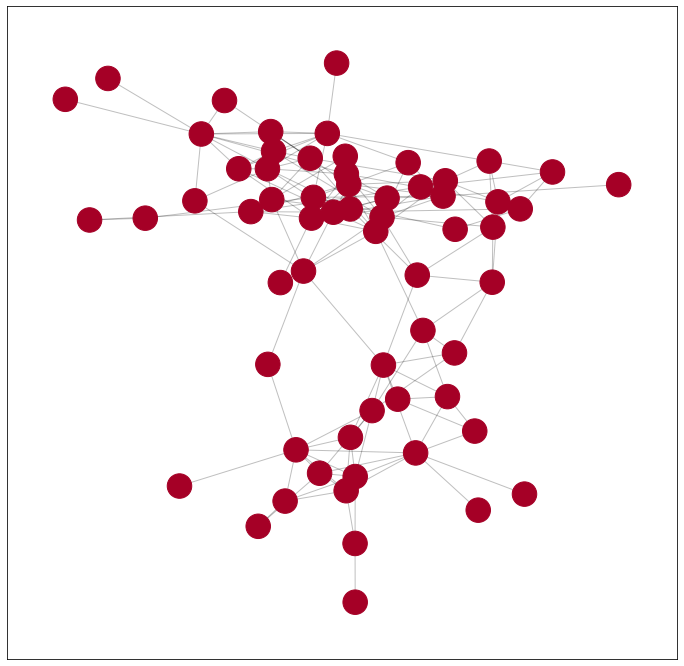

In [9]:
info('dolphins')

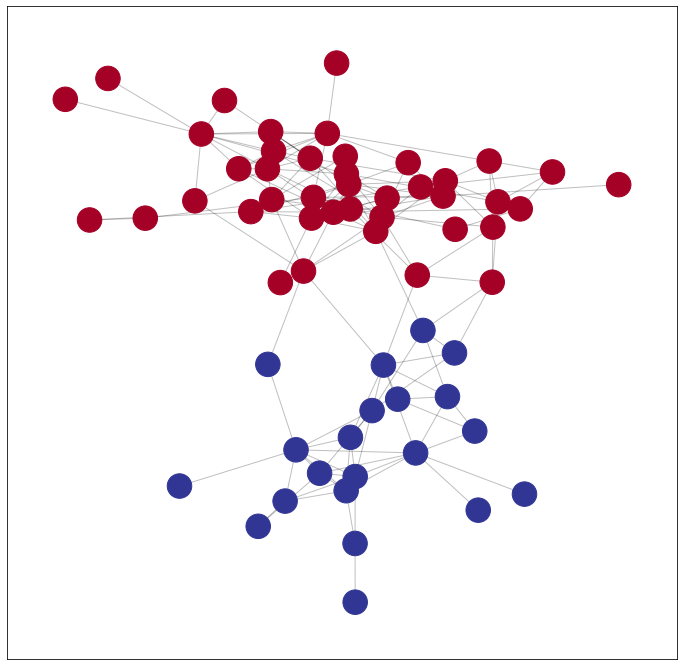

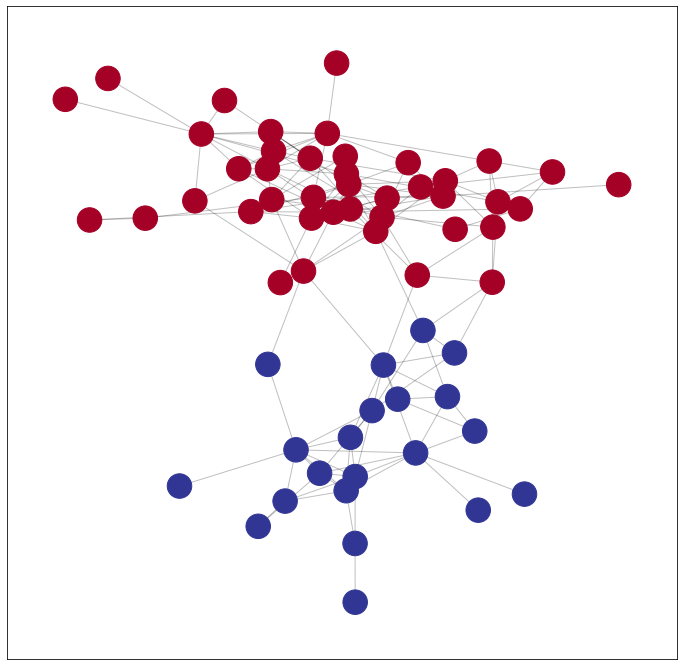

Scris cu succes în data/dolphins/my_dolphins.dat


In [10]:
input('dolphins', 2)

Graph with 115 nodes and 613 edges


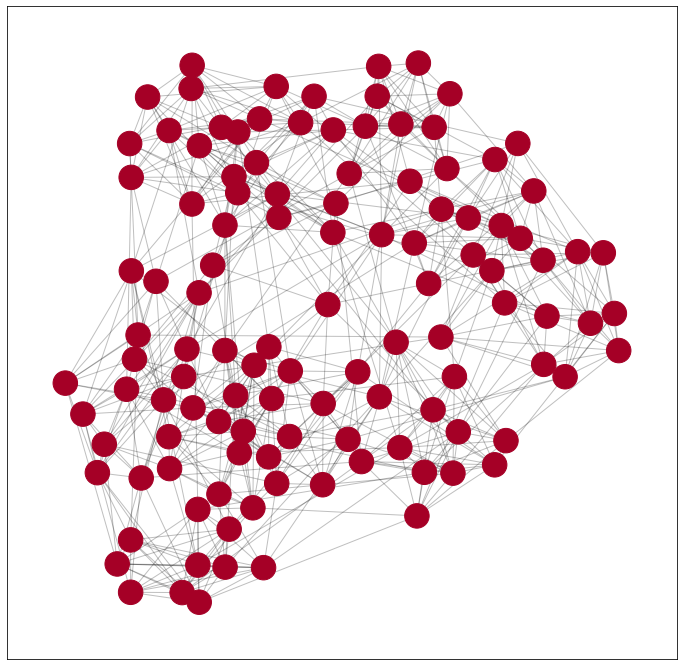

In [11]:
info('football')

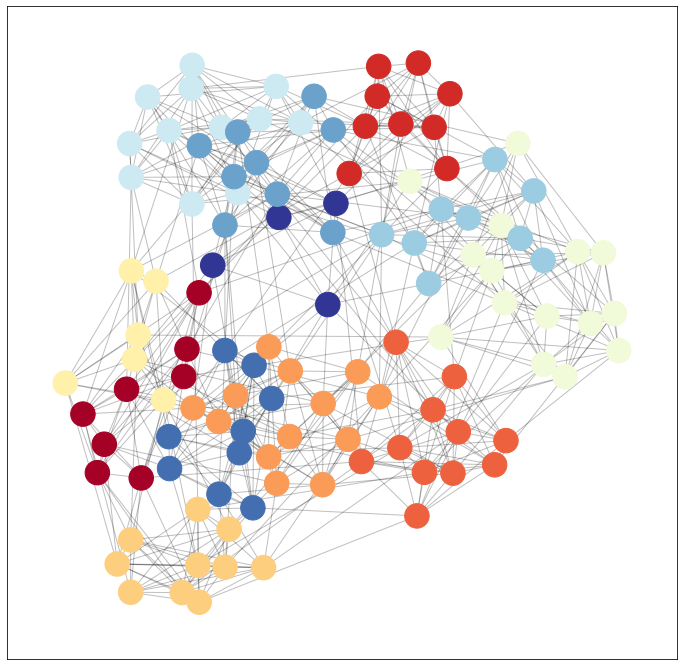

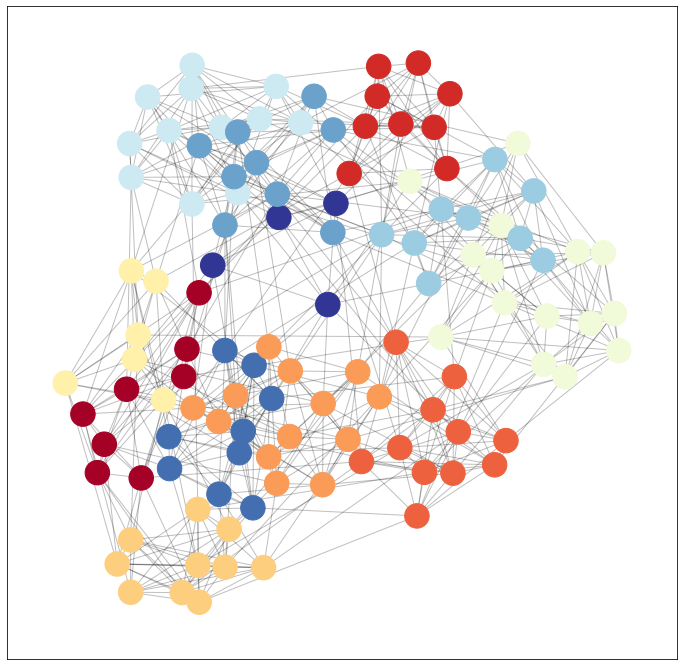

Scris cu succes în data/football/my_football.dat


In [12]:
input('football', 12)

Graph with 34 nodes and 78 edges


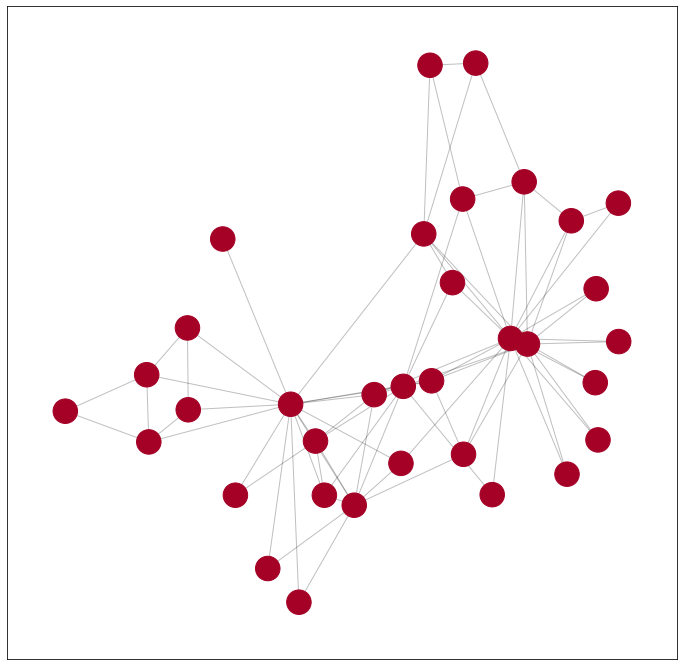

In [13]:
info('karate')

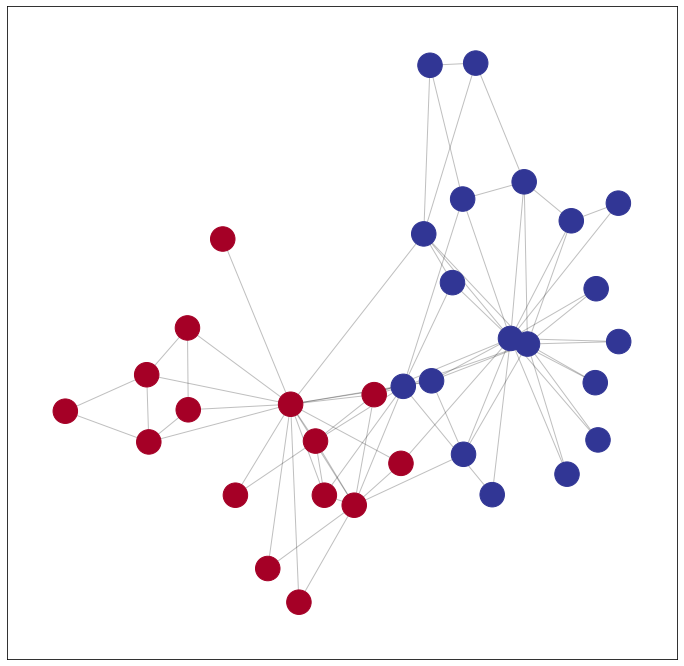

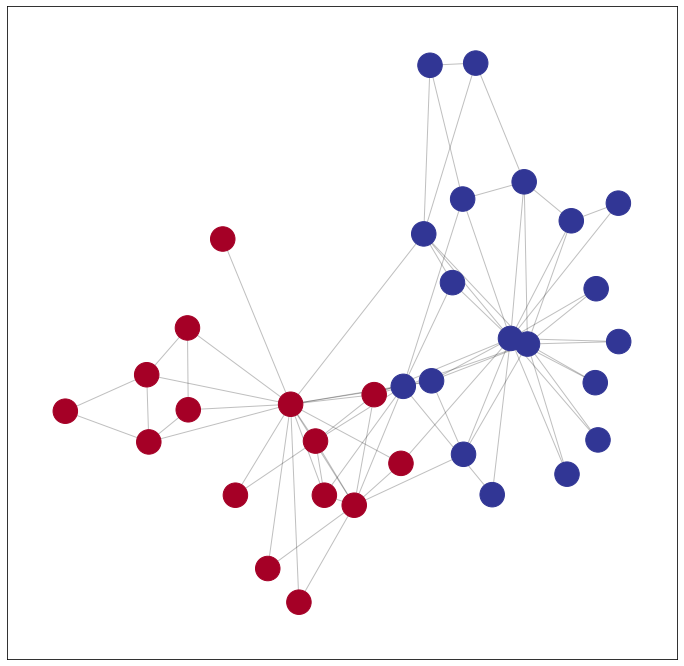

Scris cu succes în data/karate/my_karate.dat


In [14]:
input('karate', 2)

Graph with 105 nodes and 441 edges


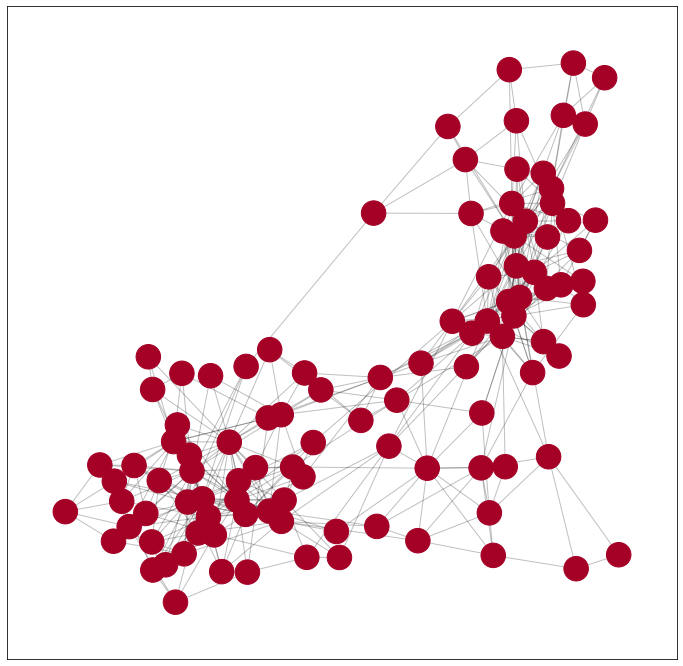

In [15]:
info('krebs')

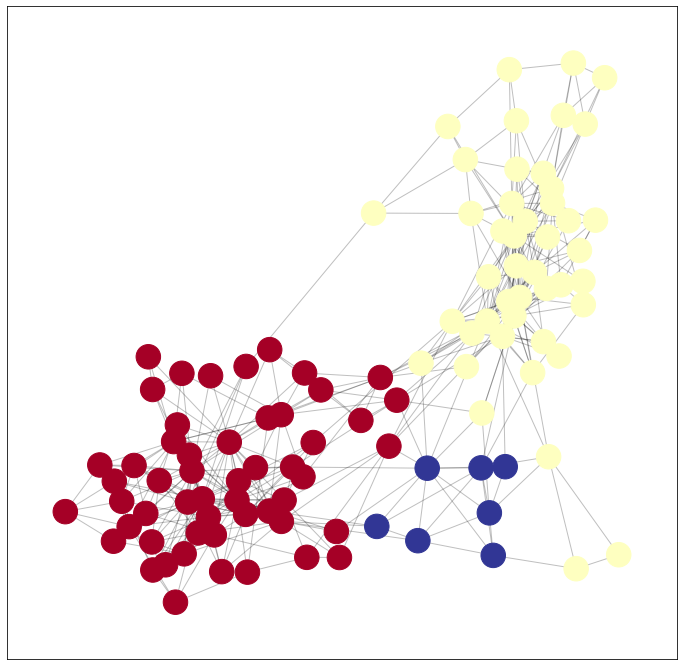

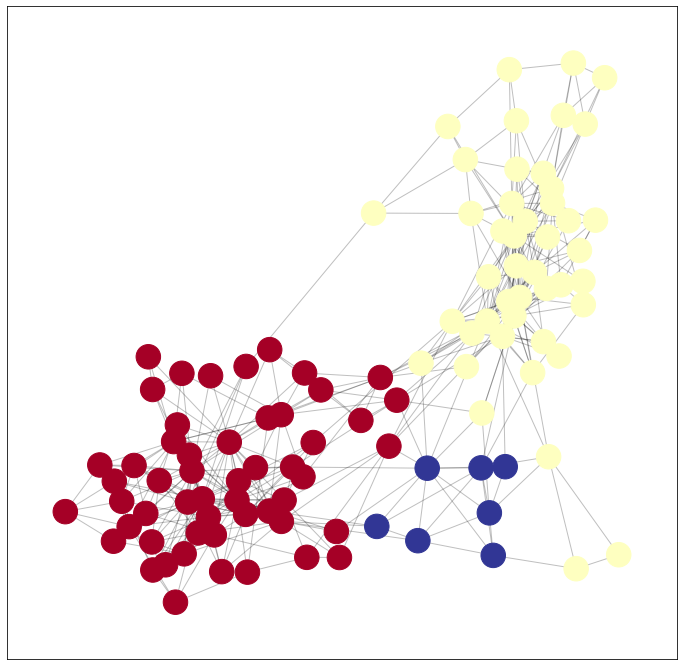

Scris cu succes în data/krebs/my_krebs.dat


In [16]:
input('krebs', 3)

Graph with 112 nodes and 425 edges


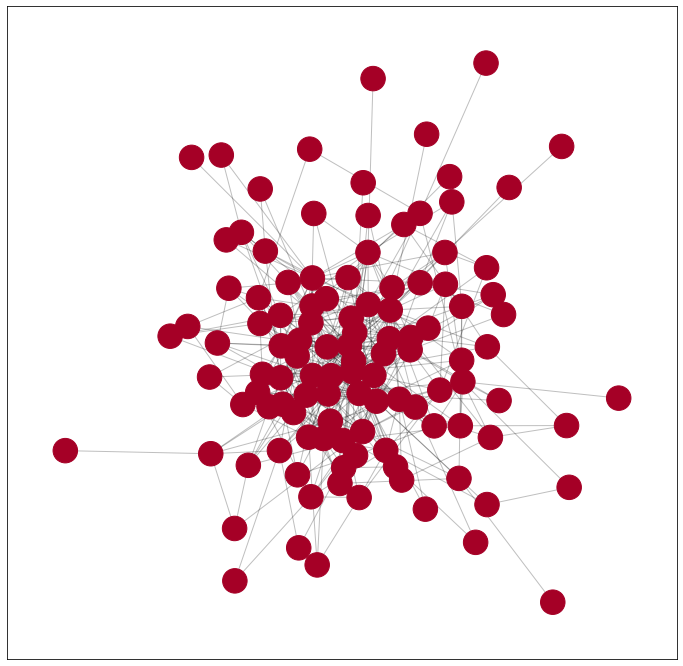

In [17]:
info('dickens')

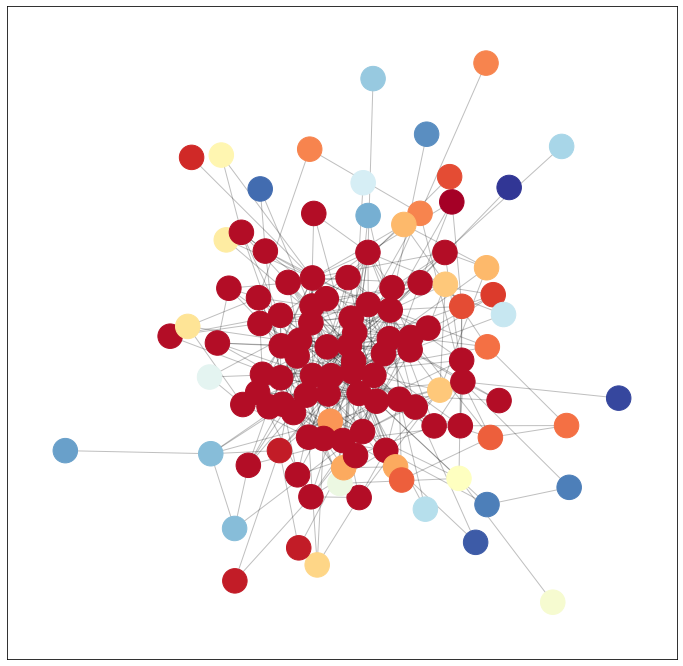

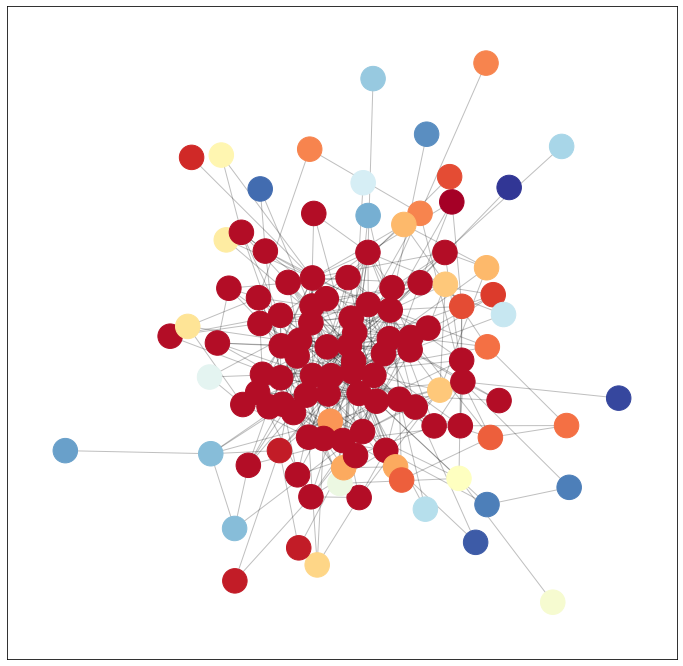

Scris cu succes în data/dickens/my_dickens.dat


In [49]:
input('dickens', 35)

Graph with 77 nodes and 254 edges


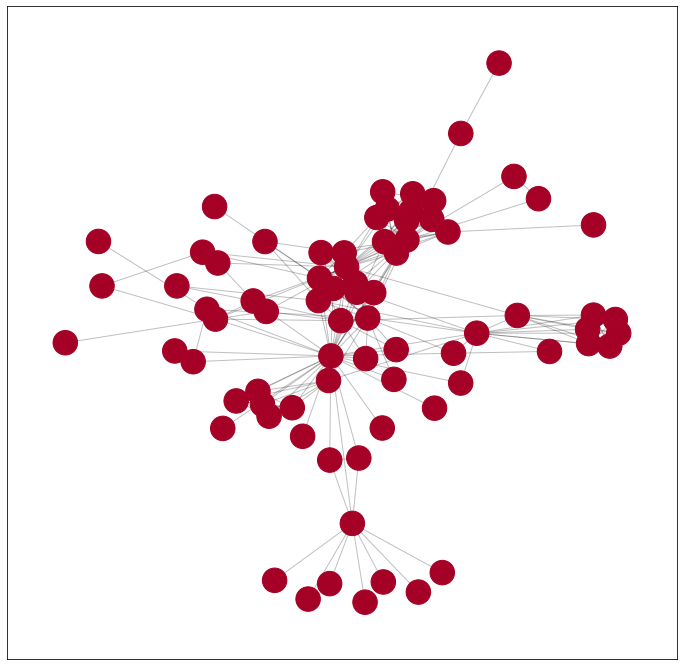

In [64]:
info('lesmis')

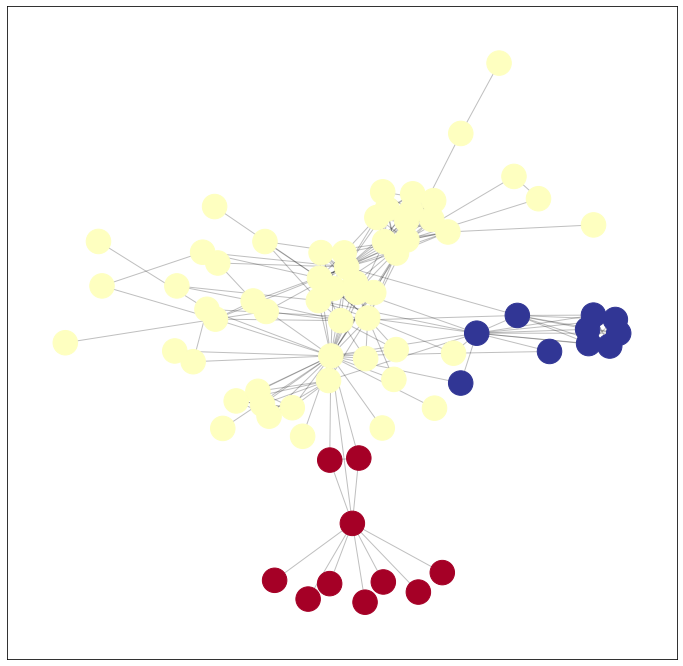

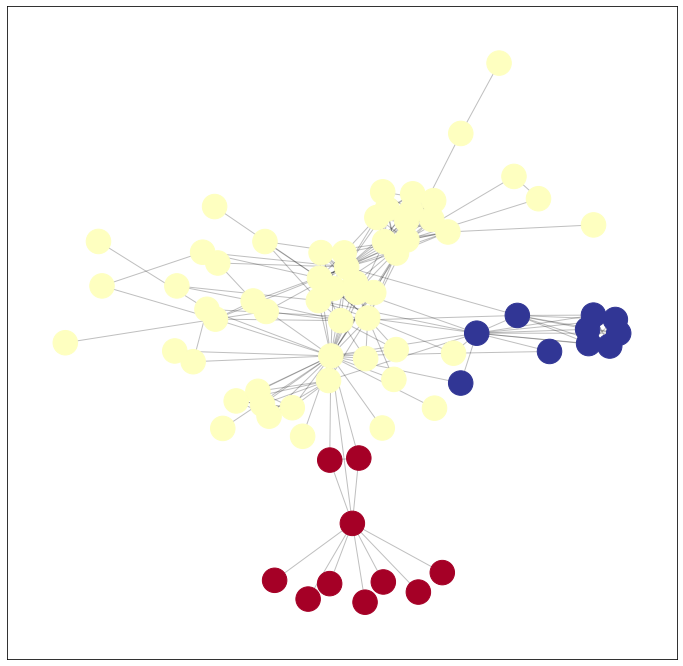

Scris cu succes în data/lesmis/my_lesmis.dat


In [69]:
input('lesmis', 3)

In [3]:
info('power')

NameError: name 'nx' is not defined

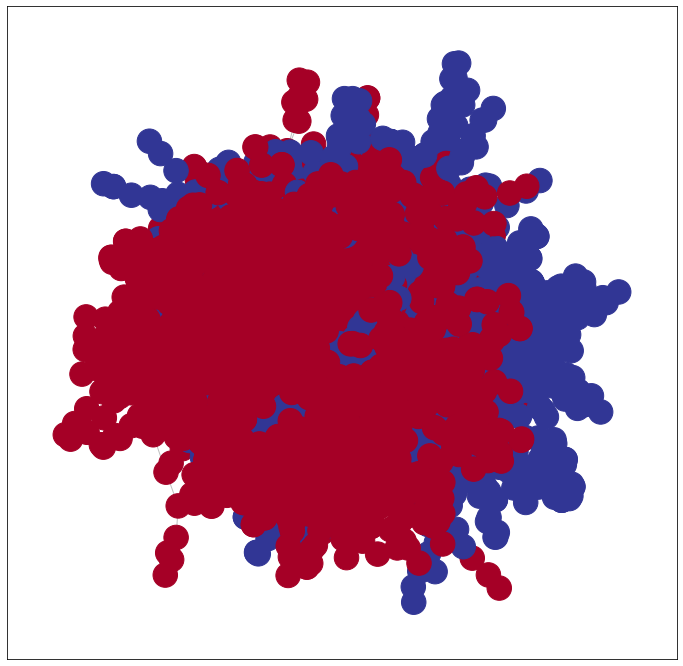

In [ ]:
input('power', 2)